In [ ]:
import pandas as pd
# pandas is aliased as pd
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import numpy as np
# numpy is aliased as np

#### How to install pmdarima

1) In CMD<br>
pip install pmdarima

2) In Jupyter<br>
!pip install pmdarima

#### How to install nasdaqdatalink

1) In CMD<br>
pip install nasdaq-data-link

2) In Jupyter<br>
!pip install nasdaq-data-link

In [ ]:
# !pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
import nasdaqdatalink

In [ ]:
df = nasdaqdatalink.get("BP/OIL_RESERVES_IND")
print(type(df)) # dataframe
df.head()  # top 5 values

<class 'pandas.core.frame.DataFrame'>


,Value
Date,
1980-12-31,2.756959
1981-12-31,3.482400
1982-12-31,3.504700
1983-12-31,3.620000
1984-12-31,3.760000


In [ ]:
df.shape
# number of rows=41, number of columns=1

(41, 1)

#### Handle the null values

In [ ]:
df.isnull().sum()

Value    0
dtype: int64

In [ ]:
df.dtypes

Value    float64
dtype: object

#### Saving the data

In [ ]:
df.to_csv('oil_reserves.csv')

In [ ]:
df

,Value
Date,
1980-12-31,2.756959
1981-12-31,3.482400
1982-12-31,3.504700
1983-12-31,3.620000
1984-12-31,3.760000
1985-12-31,3.761310
1986-12-31,4.635000
1987-12-31,4.415600
1988-12-31,4.463500


In [ ]:
print(df.index.min())
print(df.index.max())

1980-12-31 00:00:00
2020-12-31 00:00:00


#### Plot the values

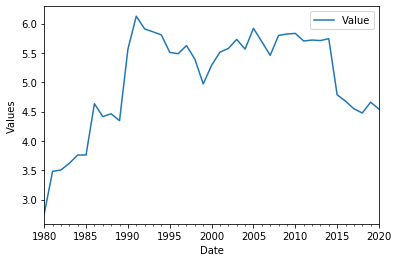

In [ ]:
df.plot()
plt.ylabel('Values')
plt.show()

#### Additive Seasonal Decomposition
Additive Decomposition<br>
Time Series data = Trend + Seasonality + Irregular componenets

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

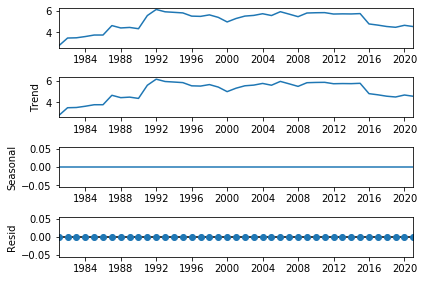

In [ ]:
decompose = seasonal_decompose(df,model='additive')
decompose.plot()
plt.show()

#### Split the data into train and test

In [ ]:
df.shape
# rows=41,columns=1

(41, 1)

In [ ]:
train = df['Value'][:37]
test = df['Value'][37:]
print(type(train))
print(type(test))
print(train.shape) # 37 rows
print(test.shape)  # 4 rows

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
(37,)
(4,)


In [ ]:
train.tail()

Date
2012-12-31    5.719713
2013-12-31    5.711031
2014-12-31    5.743410
2015-12-31    4.786068
2016-12-31    4.678238
Name: Value, dtype: float64

In [ ]:
test.head()

Date
2017-12-31    4.548865
2018-12-31    4.476577
2019-12-31    4.660614
2020-12-31    4.543292
Name: Value, dtype: float64

#### Plot the train and test data

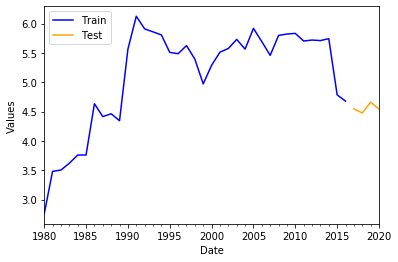

In [ ]:
train.plot(color='blue',label='Train')
test.plot(color='orange',label='Test')
plt.ylabel('Values')
plt.legend()
plt.show()

#### Creating a function to compute Mean Squared Error, Root Mean Squared Error and Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# ytest = test data, ypred = forecasted data

def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mean_squared_error(ytest,ypred))
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)

#### Implementing auto_arima from pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
model = auto_arima(train,start_p=0,start_q=0,
                  max_p=5,max_q=5,D=1,trace=True,supress_warnings=True,
                  random_state=20)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=54.671, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=48.447, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=37.111, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=39.040, Time=0.17 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=41.111, Time=0.14 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.162 seconds


In [ ]:
print(test.shape)

(4,)


In [ ]:
fcast_m1 = model.predict(n_periods=4)
fcast_m1

array([4.58282957, 4.48742075, 4.39201192, 4.2966031 ])

In [ ]:
print(test.index)
test

DatetimeIndex(['2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31'], dtype='datetime64[ns]', name='Date', freq=None)


Date
2017-12-31    4.548865
2018-12-31    4.476577
2019-12-31    4.660614
2020-12-31    4.543292
Name: Value, dtype: float64

In [ ]:
fcast_res = pd.Series(fcast_m1,index=test.index)
fcast_res

Date
2017-12-31    4.582830
2018-12-31    4.487421
2019-12-31    4.392012
2020-12-31    4.296603
dtype: float64

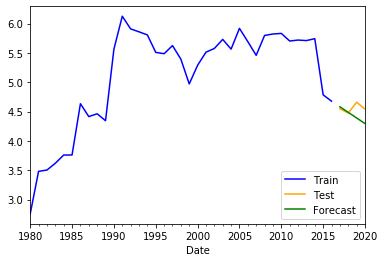

In [ ]:
train.plot(color="blue", label='Train')
test.plot(color="orange", label='Test')
fcast_res.plot(color="green", label='Forecast')
plt.title('AutoARIMA (p=0,d=2,q=1) Model')
plt.legend()
plt.show()

In [ ]:
eval_model(test,fcast_res)

MAE 0.1400247146396365
MSE 0.03356847156351726
RMSE 0.1832170067529684


#### Implementing ARIMA(p=2,d=1,q=2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# order(p=2,d=1,q=2)
m2 = ARIMA(train,order=(2,1,2))
ar_m2 = m2.fit()

E:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
E:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
E:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


In [ ]:
test

Date
2017-12-31    4.548865
2018-12-31    4.476577
2019-12-31    4.660614
2020-12-31    4.543292
Name: Value, dtype: float64

In [ ]:
fcast_m2 = ar_m2.forecast(4)
fcast_m2

2017-12-31    4.817981
2018-12-31    4.786012
2019-12-31    4.650592
2020-12-31    4.696867
Freq: A-DEC, dtype: float64

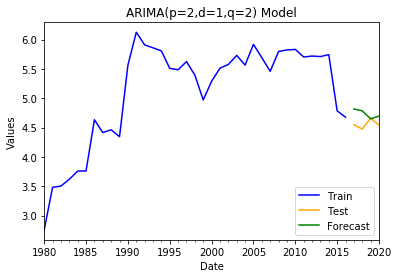

In [ ]:
train.plot(color="blue", label='Train')
test.plot(color="orange", label='Test')
fcast_m2.plot(color="green", label='Forecast')
plt.title('ARIMA(p=2,d=1,q=2) Model')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
eval_model(test,fcast_m2) # arima(p=2,d=1,q=2)

MAE 0.1855368607426222
MSE 0.04796464331701863
RMSE 0.2190083179174221


In [ ]:
eval_model(test,fcast_res) # auto_arima(p=0,d=2,q=1)

MAE 0.1400247146396365
MSE 0.03356847156351726
RMSE 0.1832170067529684
